In [1]:
import torch.nn as nn

In [2]:
learning_rate=0.01
reduceLR_factor=0.5
reduceLR_patience=5

In [3]:
# Parameters
learning_rate = 0.01
reduceLR_factor = 0.4
reduceLR_patience = 5
parent_dir = "c:\\Users\\pande\\OneDrive\\Desktop\\code\\ML\\ELL409-Machine-Learning-Coursework\\assignment-01\\code\\q1linear-classification"


In [4]:
# editable parameters
quesname='q1/'

batchSize=64
savename='q1/'

# learning_rate=0.01
# reduceLR_factor=0.5
# reduceLR_patience=5

# logfilename=f
tunefilename=f'patience={reduceLR_patience}_LR_factor={reduceLR_factor}'
logfilename=tunefilename+'.log'
plotfilename=tunefilename+'.png'
num_epochs = 2

criterion = nn.CrossEntropyLoss()


def loginfo(converged=False,testnum=1):     
   
    # logging.info(f"\nTest {testnum}")
    logging.info(f"initial learning rate : {learning_rate:.2f} ")
    logging.info(f"Accuracy: {accuracy:.2f}%")
    # logging.info(f"Training Time: {training_time:.2f} seconds")
    logging.info(f"Number of epochs to converge: {num_epochs:.2f} ")
    
    # logging.info(f"reduceLR_factor: {reduceLR_factor:.2f} ")
    # logging.info(f"reduceLR_patience : {reduceLR_patience:.2f} ")

    # logging.info(f"Test Session Finished \n")
  

In [5]:
# Initialisation
import numpy as np
import math
import torch as t
import torch 
import os


# import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

import matplotlib.pyplot as plt
%matplotlib inline
import logging

log_dir = '../../log'
os.makedirs(log_dir, exist_ok=True)

log_dir=os.path.join(log_dir, quesname)
os.makedirs(log_dir, exist_ok=True)

plot_dir=log_dir
os.makedirs(plot_dir, exist_ok=True)

logfile=os.path.join(log_dir, logfilename)
plotfile=os.path.join(log_dir, plotfilename)

logging.basicConfig(filename=logfile, level=logging.INFO, format='%(message)s')
# logging.basicConfig(filename=logfile, level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')



In [6]:

# part 1 and 2:
# dataset loading:
training_data = datasets.FashionMNIST(
    root="../../data/",
    train=True,
    download=True,
    transform=ToTensor() # Normalisation step
    
)

# note that ToTensor not just converts the image into a tensor but also normalises its intensity in range 0 to 1


test_data = datasets.FashionMNIST(
    root="../../data/",
    train=False,
    download=True,
    transform=ToTensor() # Normalisation step
)

# Create data loaders for training and testing


train_loader = DataLoader(training_data, batch_size=batchSize, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batchSize, shuffle=False)

In [7]:
# part 3:



# builtin classifier:

# Define the model

# model saving
# Define a directory to save models
save_dir = '../../saved_models/'
save_dir=os.path.join(save_dir, savename)

os.makedirs(save_dir, exist_ok=True)

model = nn.Sequential(

    # we need to flatten the input data from 2d tensor into 1d tensor of 784 values (28*28) since data is in form of images
    nn.Flatten(),  # Flatten the input data

    nn.Linear(in_features=784, out_features=10),  # Linear layer   
    # nn.Linear(in_features=784, out_features=batchSize),  # Linear layer   

    nn.BatchNorm1d(10),
    # this normalsises input tensors by scaling and shifting
    # makes mean 0 and variance 1

    # softmax function, or normalized exponential function converts a vector of K real numbers into a probability distribution of K possible outcomes
    nn.Softmax(dim=1)  # Softmax activation

    
)

# Specify the path to the saved checkpoint file
# model_path = '../../saved_models/model_checkpoint.pth'

# tk
model_path = os.path.join(save_dir, 'ignore.pth')

# model_path = os.path.join(save_dir, 'model_checkpoint.pth')

# Check if the file exists before loading
if os.path.exists(model_path):
    # Load the model checkpoint
    checkpoint = torch.load(model_path)

    # Load the model's state_dict
    model.load_state_dict(checkpoint)
    print("Model loaded successfully.")
else:
    print(f"Checkpoint file '{model_path}' not found. Model not loaded.")

# custom made classifier
'''
class LinearClassifier(nn.Module):
    def __init__(self):
        super(LinearClassifier, self).__init__()

        # Define the linear layer
        # we used 28*28 input and 10 labels because we are working with MNIST database
        self.fc = nn.Linear(28 * 28, 10)  # 28*28 input features, 10 output classes
        
        # Define an activation function (e.g., softmax for classification)

        # softmax function, or normalized exponential function converts a vector of K real numbers into a probability distribution of K possible outcomes
        self.softmax = nn.Softmax(dim=1)

    #IMPORTANT the name 'forward' is not arbitrary; it's a convention in PyTorch, and this method is automatically called when we pass data through our model.
    def forward(self, x):

        # we need to flatten the input data from 2d tensor into 1d tensor of 784 values (28*28) since data is in form of images
        x = x.view(x.size(0), -1)  # Flatten the input tensor

        x = self.fc(x)  # Apply the linear transformation
        x = self.softmax(x) # Apply the activation function
        return x
'''
print('model created')

Checkpoint file '../../saved_models/q1/ignore.pth' not found. Model not loaded.
model created


In [8]:
print("Model structure before training: ", model, "\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure before training:  Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=10, bias=True)
  (2): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): Softmax(dim=1)
) 


Layer: 1.weight | Size: torch.Size([10, 784]) | Values : tensor([[ 0.0181,  0.0109, -0.0037,  ..., -0.0079, -0.0168,  0.0289],
        [-0.0293,  0.0205,  0.0182,  ...,  0.0047,  0.0099,  0.0316]],
       grad_fn=<SliceBackward0>) 

Layer: 1.bias | Size: torch.Size([10]) | Values : tensor([0.0224, 0.0116], grad_fn=<SliceBackward0>) 

Layer: 2.weight | Size: torch.Size([10]) | Values : tensor([1., 1.], grad_fn=<SliceBackward0>) 

Layer: 2.bias | Size: torch.Size([10]) | Values : tensor([0., 0.], grad_fn=<SliceBackward0>) 



In [9]:
# part 4:

# Define the loss function


import torch.optim as optim
# Define the optimizer (e.g., SGD)



optimizer = optim.SGD(model.parameters(), lr=learning_rate)

'''
about SGD: Stochastic Gradient Descent:
basically it performs seqeuntial updation of paramters after each epoch, using formula :
parameter = parameter - learning_rate * gradient

'''
from torch.optim.lr_scheduler import ReduceLROnPlateau

scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=reduceLR_factor, patience=reduceLR_patience, verbose=True)

'''
here mode = min : means reduce (instead of increase) LR when error plateaus

patience = how many epochs to wait before reducing LR
'''

print('part 4 done')



part 4 done


Epoch [1/2] - Loss: 1.9119, Learning Rate: 0.010000


Epoch [2/2] - Loss: 1.8093, Learning Rate: 0.010000
Training complete
time taken to train :  12.67083477973938
time per epoch :  6.34


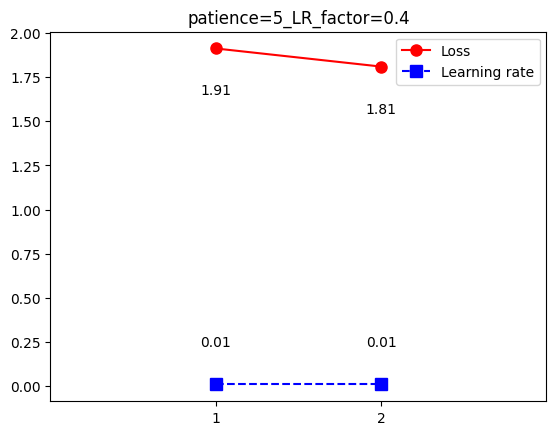

../../log\q1/patience=5_LR_factor=0.4.png


In [10]:
# part 5
# Define the number of training epochs


import time
t1=time.time()
# Training loop

# running_loss_data=[]
converged=False
avg_loss_data=[]
LR_data=[]
try:
    
    for epoch in range(num_epochs):
        # Set the model in training mode
        model.train()
        
        running_loss = 0.0
        
        # Iterate over the training dataset
        for inputs, labels in train_loader:  # Replace train_loader with your data loader
            # Zero the gradients
            optimizer.zero_grad()
            
            # Forward pass
            outputs = model(inputs)
            
            # Compute the loss
            loss = criterion(outputs, labels)
            
            # Backpropagation
            loss.backward()
            
            # Update the model's parameters
            optimizer.step()
            
            # Track the running loss
            running_loss += loss.item()
        
        # Calculate and print the average loss for this epoch
        average_loss = running_loss / len(train_loader)



        current_lr = optimizer.param_groups[0]['lr']
        
        # running_loss_data.append(running_loss)
        avg_loss_data.append(average_loss)
        LR_data.append(current_lr)

        
        
        

        # Update the learning rate scheduler with the training loss
        scheduler.step(average_loss)

        
        print(f"Epoch [{epoch+1}/{num_epochs}] - Loss: {average_loss:.4f}, Learning Rate: {current_lr:.6f}")
        if current_lr==0:
            converged=True
            print("training stopping")
            num_epochs=epoch+1
            raise KeyboardInterrupt

        
        # print(f"Epoch [{epoch+1}/{num_epochs}] - Loss: {average_loss:.4f}")
        
except KeyboardInterrupt:
    print("\n ---------training interrupted----------- \n")





print("Training complete")
t2=time.time()
training_time=t2-t1
print('time taken to train : ',training_time)
print('time per epoch : ',round(training_time/num_epochs,2))

# pltfolder=f"{learning_rate}|{num_epochs}|{reduceLR_factor}|{reduceLR_patience}"
epoch_data=np.arange(1, num_epochs+1)
plt.plot(epoch_data,avg_loss_data, marker='o', linestyle='-', markersize=8, label='Loss', color='red')
plt.plot(epoch_data,LR_data,  marker='s', linestyle='--', markersize=8, label='Learning rate', color='blue')
plt.title(tunefilename)
plt.xlim(0, num_epochs+1)
plt.xticks(epoch_data,epoch_data)
# Add labels for each data point (y-values)
for i in range(num_epochs):
    plt.text(epoch_data[i], avg_loss_data[i]-0.2, f'{round(avg_loss_data[i],2)}', ha='center', va='top')
    plt.text(epoch_data[i], LR_data[i]+0.2, f'{LR_data[i]}', ha='center', va='bottom')

plt.legend()
plt.savefig(plotfile)
plt.show()
print(plotfile)




# Save the model checkpoint to the specified directory
# model_path = os.path.join(save_dir, 'model_checkpoint.pth')

# tk
# torch.save(model.state_dict(), model_path)


In [11]:
print("Model structure after training: ", model, "\n\n")
print("jere")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure after training:  Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=10, bias=True)
  (2): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): Softmax(dim=1)
) 


jere
Layer: 1.weight | Size: torch.Size([10, 784]) | Values : tensor([[ 0.0181,  0.0109, -0.0036,  ..., -0.0153, -0.0181,  0.0288],
        [-0.0293,  0.0205,  0.0182,  ..., -0.0007,  0.0087,  0.0315]],
       grad_fn=<SliceBackward0>) 

Layer: 1.bias | Size: torch.Size([10]) | Values : tensor([0.0224, 0.0116], grad_fn=<SliceBackward0>) 

Layer: 2.weight | Size: torch.Size([10]) | Values : tensor([1.4509, 1.5107], grad_fn=<SliceBackward0>) 

Layer: 2.bias | Size: torch.Size([10]) | Values : tensor([0.0068, 0.0128], grad_fn=<SliceBackward0>) 



In [ ]:
# part 6 :
# testing 

# Set the model to evaluation mode
model.eval()

correct_predictions = 0
total_predictions = 0

# Iterate over the testing dataset

k=0
for inputs, labels in test_loader:  # Use your test data loader
    k+=1
    # Forward pass to obtain predictions
    outputs = model(inputs)
    
    # Get the predicted class for each example in the batch
    _, predicted = torch.max(outputs, dim=1)
    
    # Count correct predictions in this batch
    batch_correct_predictions = (predicted == labels).sum().item()
    correct_predictions += batch_correct_predictions
    
    # Count total predictions in this batch

    batch_total_predictions = labels.size(0)
    total_predictions += batch_total_predictions 

    # Print the running accuracy for this batch
    # Update running accuracy
    batch_accuracy=batch_correct_predictions/batch_total_predictions * 100.0
    print(f"Accuracy on this batch {batch_accuracy:.2f}%")

    accuracy = (correct_predictions / total_predictions) * 100.0
    print(f"Accuracy till now:  testing dataset: {accuracy:.2f}%")

print()
print("number of tests:",k)

# Calculate the accuracy
accuracy = (correct_predictions / total_predictions) * 100.0
print(f"Accuracy on the testing dataset: {accuracy:.2f}%")
print('time taken to train : ',training_time)


# saving accuracy


  

# tk
loginfo(converged)
logging.shutdown()
print("data saved")

